# Visualization and Prediction of shopping habits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [49]:
df = pd.read_csv('data/responses.csv')

music = df.iloc[:,1:19]
movies = df.iloc[:,19:31]
interests = df.iloc[:,31:46]
hobbies = df.iloc[:,46:63]
phobias = df.iloc[:,63:73]
health = df.iloc[:,73:76]
traits = df.iloc[:,76:133]
spending = df.iloc[:,133:140]
demographics = df.iloc[:,140:150]

feature = interests.join([music.iloc[:,0],movies.iloc[:,0],hobbies,phobias,health.iloc[:,-1]])
spending.fillna(spending.mean(),inplace=True)
# Owing to using machine learning, I used fillna method instead of dropping the missing data.  
feature.fillna(feature.mean(),inplace=True).head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,3.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,3.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0,3.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0,4.0


## EDA

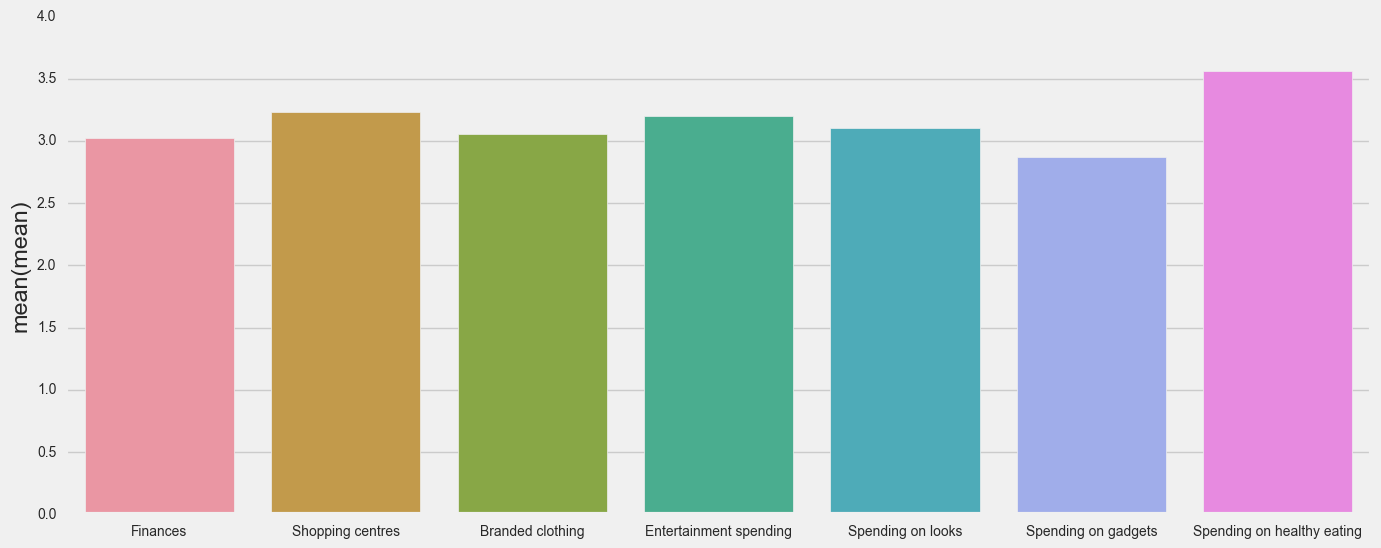

In [3]:
plt.figure(figsize=(15,6))
sns.barplot(x = spending.describe().columns, y=spending.describe().loc['mean'])

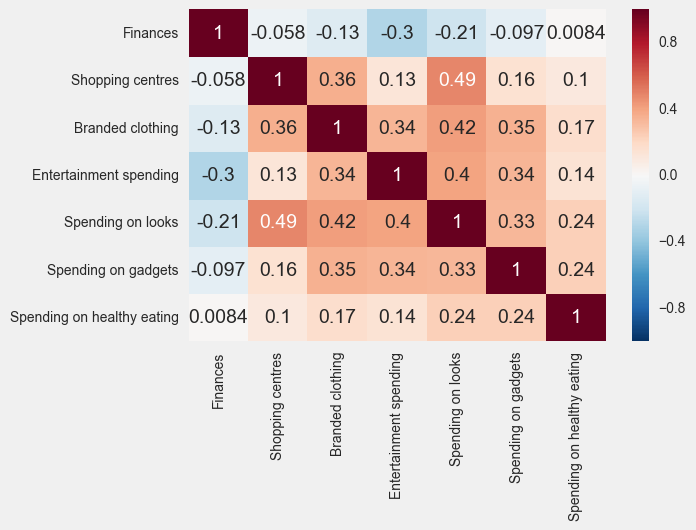

In [4]:
sns.heatmap(spending.corr(),annot=True)

**Nominal data for all.**

Female/Male:		589/409(1.44)
Left/Right:		99/901(0.11)
Only child No/Yes:	748/253(2.96)
City/Village:		704/295(2.39)
Block of flats/House:	593/406(1.46)


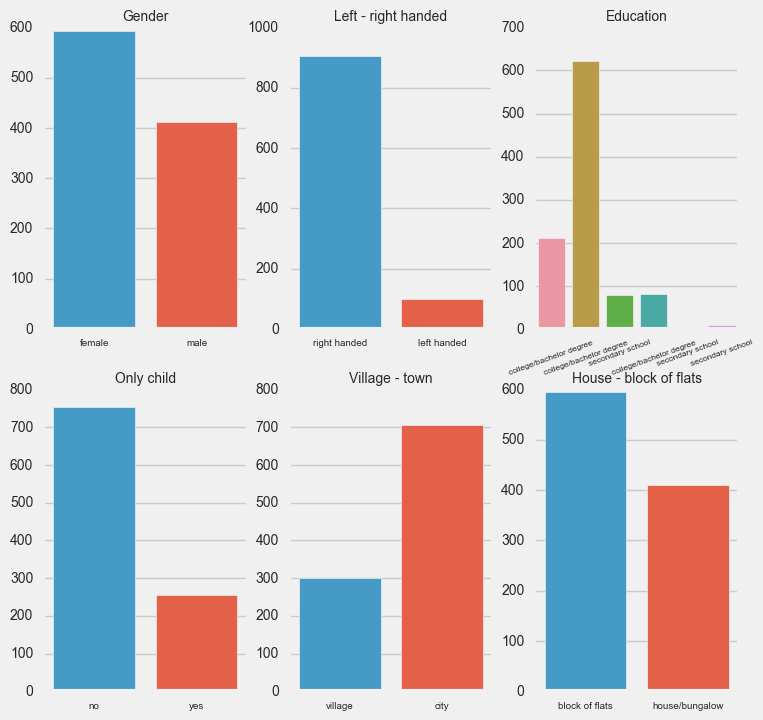

In [5]:
demo1 = ['Gender','Left - right handed','Education','Only child','Village - town','House - block of flats']

dic = dict()
for a,b in enumerate(demo1):
    dic[a] = b

fig, axes = plt.subplots(2,3,figsize=(8,8))
num = 0
for i in range(2):
    for j in range(3):
        sns.countplot(demographics[dic[num]],ax = axes[i,j])
        axes[i,j].set_title(dic[num],fontsize=10)
        axes[i,j].set_xlabel('')
        axes[i,j].set_ylabel('')
        axes[i,j].set_xticklabels(labels=demographics[dic[num]].unique(), fontsize=7)
        num+=1
        
axes[0,2].set_xticklabels(labels=demographics['Education'],rotation=20, fontsize=6)

print('Female/Male:\t\t{}/{}({:.2f})'.format(demographics.groupby('Gender').count()['Age'][0],
                                          demographics.groupby('Gender').count()['Age'][1],
                                          demographics.groupby('Gender').count()['Age'][0]/
                                          demographics.groupby('Gender').count()['Age'][1]))
print('Left/Right:\t\t{}/{}({:.2f})'.format(demographics.groupby('Left - right handed').count()['Age'][0],
                                          demographics.groupby('Left - right handed').count()['Age'][1],
                                          demographics.groupby('Left - right handed').count()['Age'][0]/
                                          demographics.groupby('Left - right handed').count()['Age'][1]))
print('Only child No/Yes:\t{}/{}({:.2f})'.format(demographics.groupby('Only child').count()['Age'][0],
                                          demographics.groupby('Only child').count()['Age'][1],
                                          demographics.groupby('Only child').count()['Age'][0]/
                                          demographics.groupby('Only child').count()['Age'][1]))
print('City/Village:\t\t{}/{}({:.2f})'.format(demographics.groupby('Village - town').count()['Age'][0],
                                          demographics.groupby('Village - town').count()['Age'][1],
                                          demographics.groupby('Village - town').count()['Age'][0]/
                                          demographics.groupby('Village - town').count()['Age'][1]))
print('Block of flats/House:\t{}/{}({:.2f})'.format(demographics.groupby('House - block of flats').count()['Age'][0],
                                          demographics.groupby('House - block of flats').count()['Age'][1],
                                          demographics.groupby('House - block of flats').count()['Age'][0]/
                                          demographics.groupby('House - block of flats').count()['Age'][1]))

**Numerical data for all.**

In [6]:
demo2 = ['Age','Height','Weight','Number of siblings']

demographics[demo2].dropna().describe()

,Age,Height,Weight,Number of siblings
count,978.000000,978.00000,978.000000,978.000000
mean,20.437628,173.52863,66.351738,1.294479
std,2.844070,10.04390,13.513669,1.018353
min,15.000000,62.00000,41.000000,0.000000
25%,19.000000,167.00000,55.000000,1.000000
50%,20.000000,173.00000,64.000000,1.000000
75%,22.000000,180.00000,75.000000,2.000000
max,30.000000,203.00000,150.000000,10.000000


## Shopping habits by gender

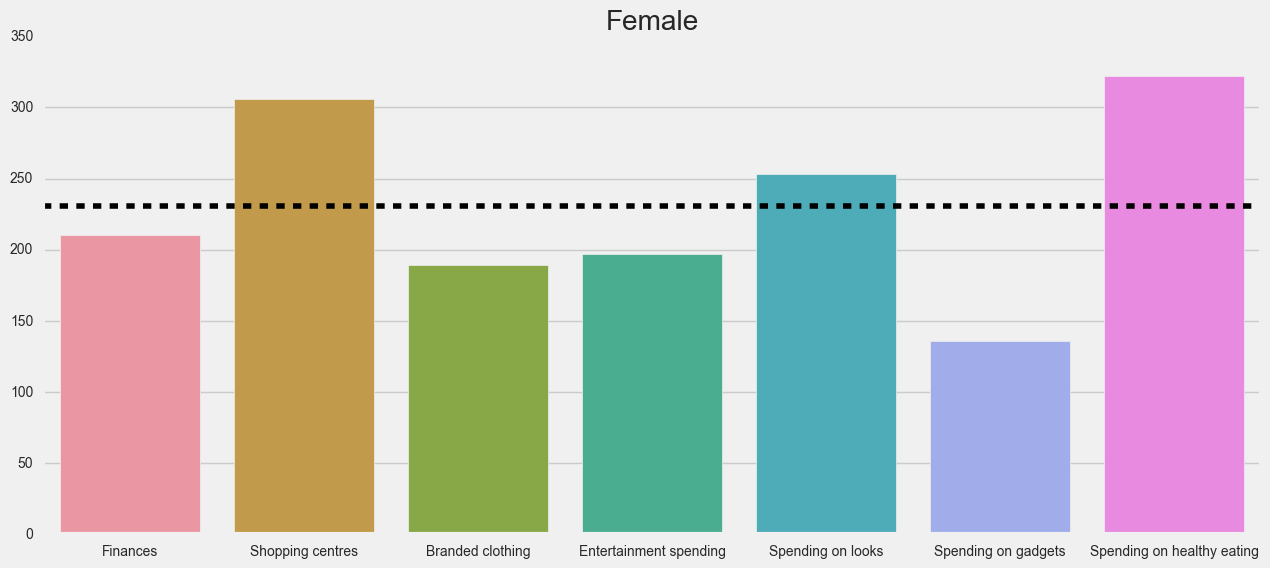

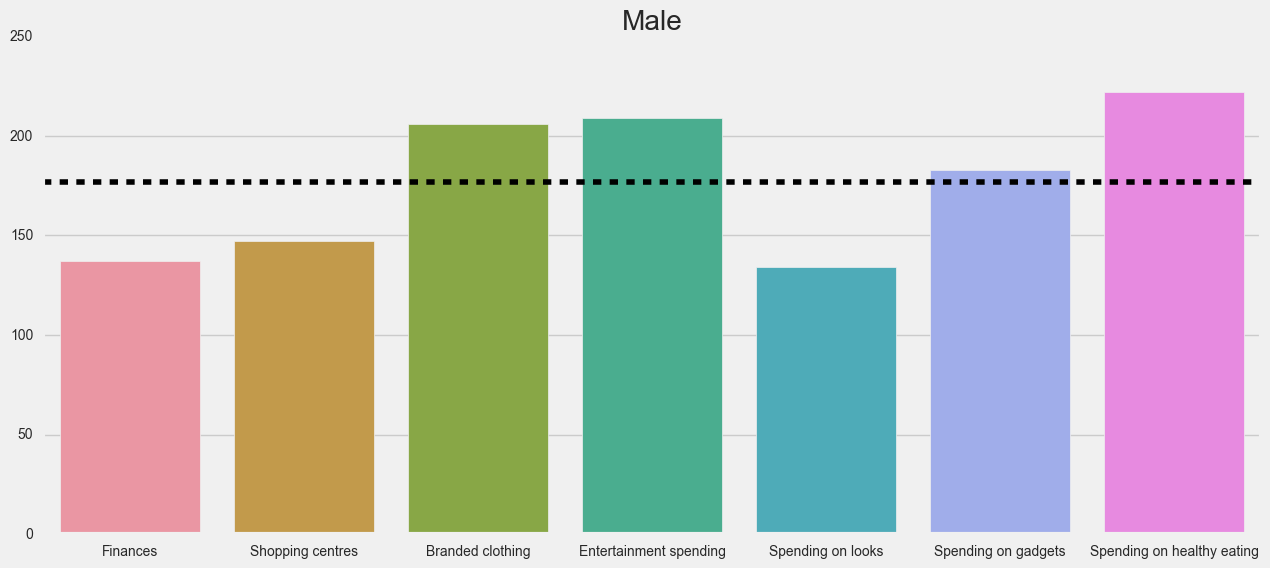

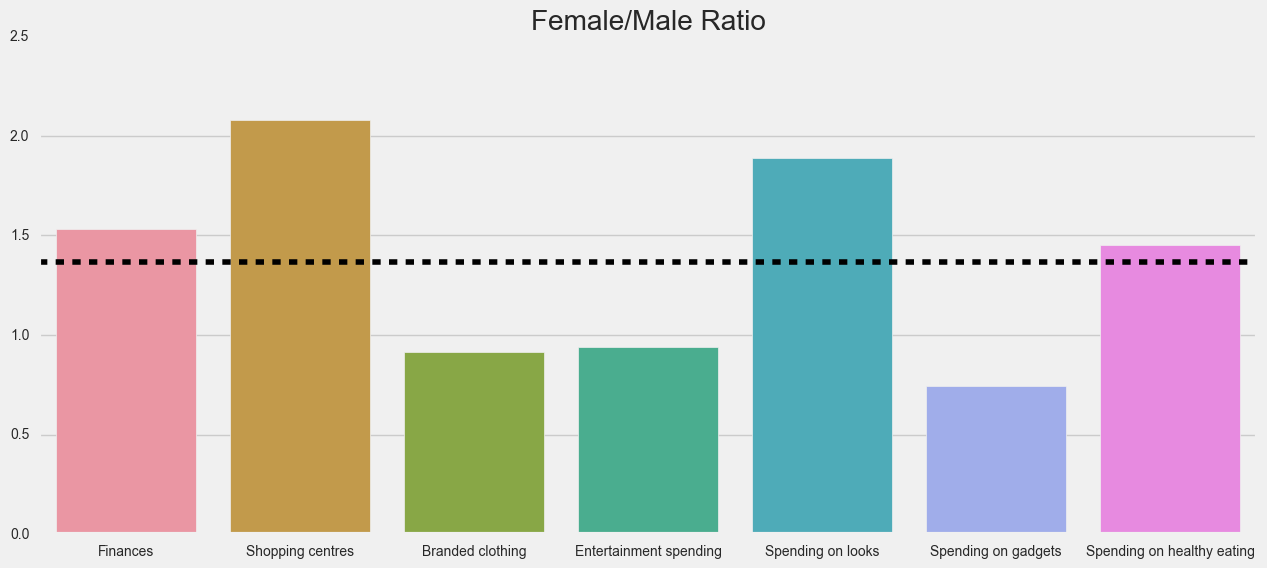

In [7]:
like = {}
for i in spending.columns:
    df_temp = demographics[spending[i]>=4]
    like[i] = df_temp
    
temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Gender').count()['Age'][0])
plt.figure(figsize=(14,6))
plt.title('Female')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)
    #print('{}'.format(i),like[i].groupby('Gender').count()['Age'])
    #print('{}'.format(i),notlike[i].groupby('Gender').count()['Age'])
#demographics
temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Gender').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('Male')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Gender').count()['Age'][0]/like[i].groupby('Gender').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('Female/Male Ratio')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

## Shopping habits by left or right hand

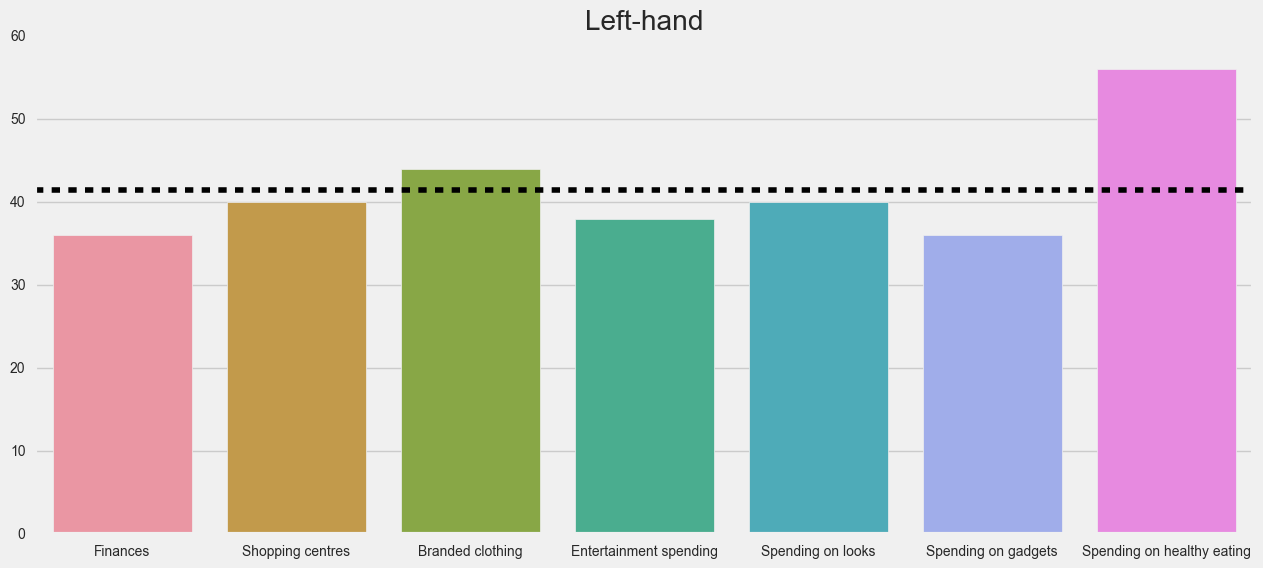

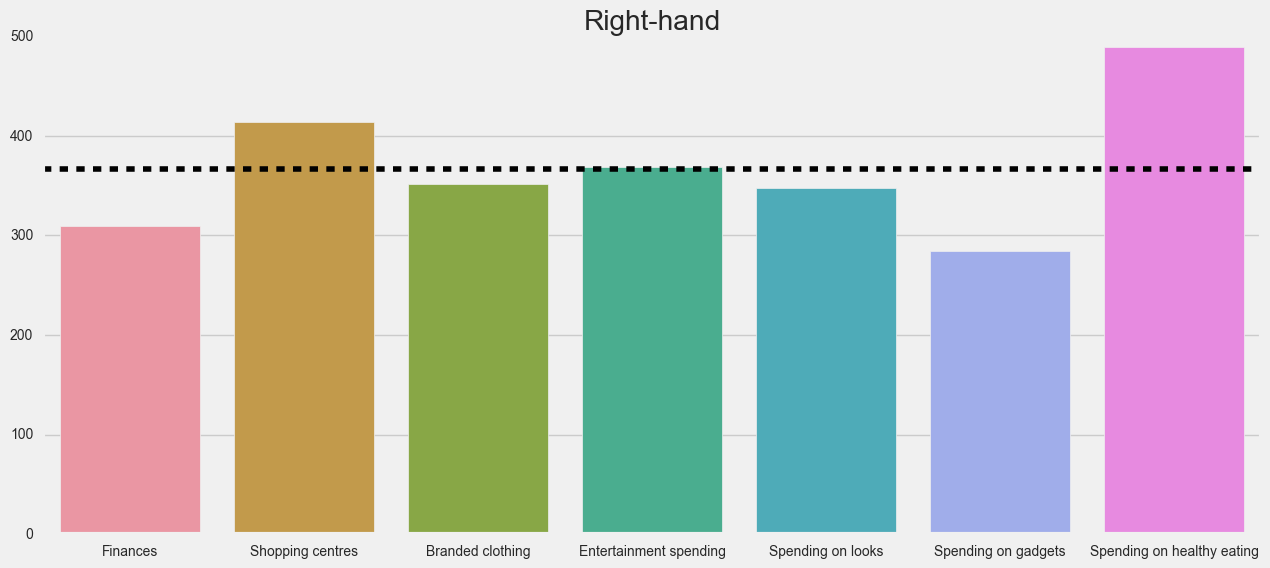

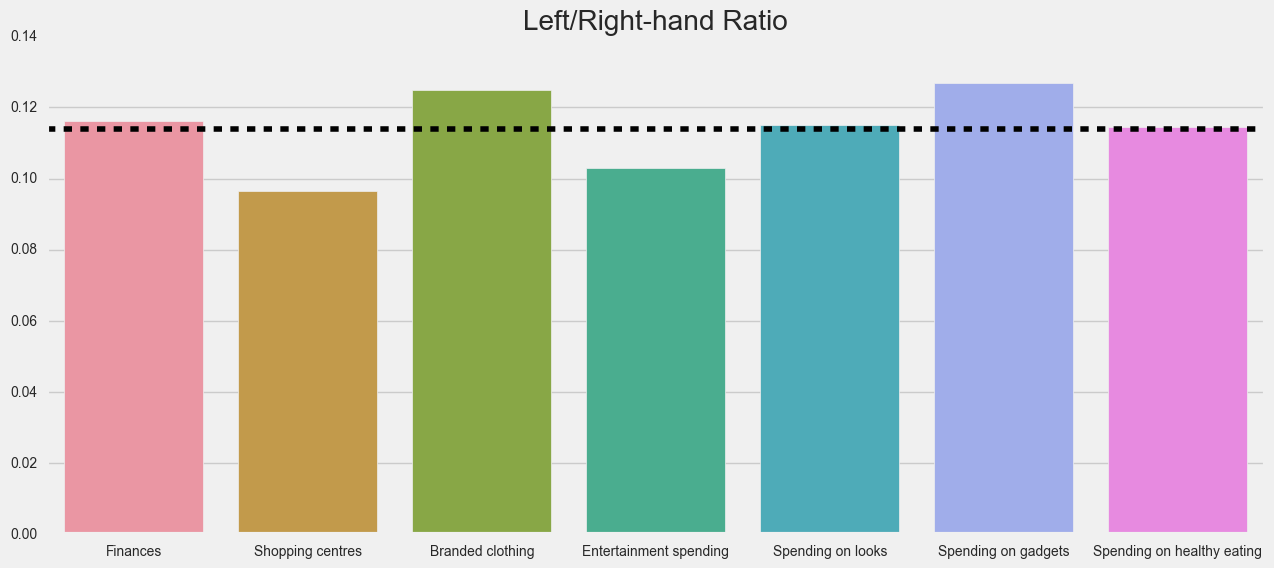

In [8]:
temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Left - right handed').count()['Age'][0])
plt.figure(figsize=(14,6))
plt.title('Left-hand')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)
    
temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Left - right handed').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('Right-hand')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Left - right handed').count()['Age'][0]/
                like[i].groupby('Left - right handed').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('Left/Right-hand Ratio')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

## Shopping habits by education

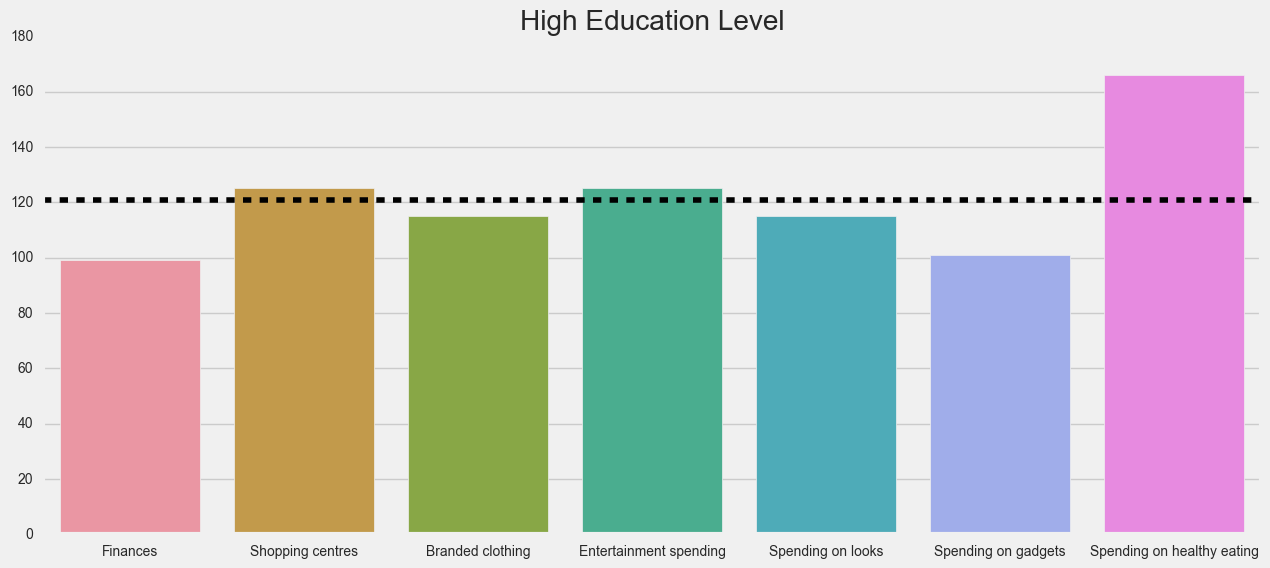

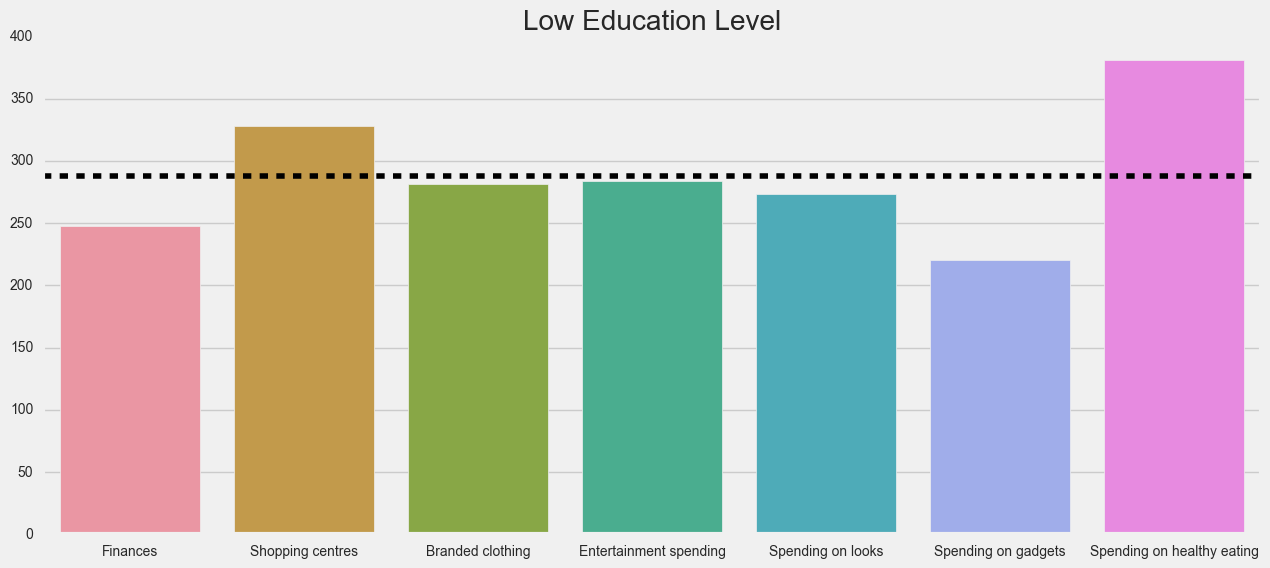

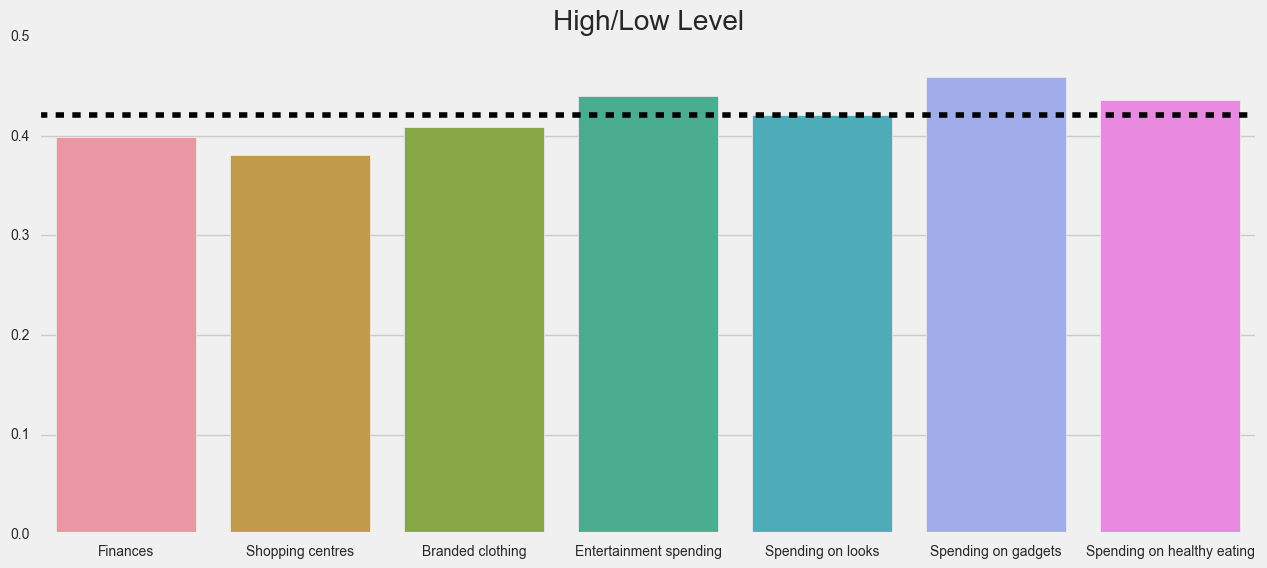

In [9]:
h_ed = []
for i in spending.columns:
    
    h_ed.append(like[i].groupby('Education').count()['Age'][0]+
                like[i].groupby('Education').count()['Age'][2]+
                like[i].groupby('Education').count()['Age'][3])
plt.figure(figsize=(14,6))
plt.title('High Education Level')
plt.axhline(y=np.mean(h_ed), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,h_ed)

l_ed = []
for i in spending.columns:
    
    l_ed.append(like[i].groupby('Education').count()['Age'][1]+
                like[i].groupby('Education').count()['Age'][4]+
                like[i].groupby('Education').count()['Age'][5])
plt.figure(figsize=(14,6))
plt.title('Low Education Level')
plt.axhline(y=np.mean(l_ed), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,l_ed)

temp = []
for i in range(len(spending.columns)):
    temp.append(h_ed[i]/l_ed[i])

plt.figure(figsize=(14,6))
plt.title('High/Low Level')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

## Shopping habits by 'only child variable'

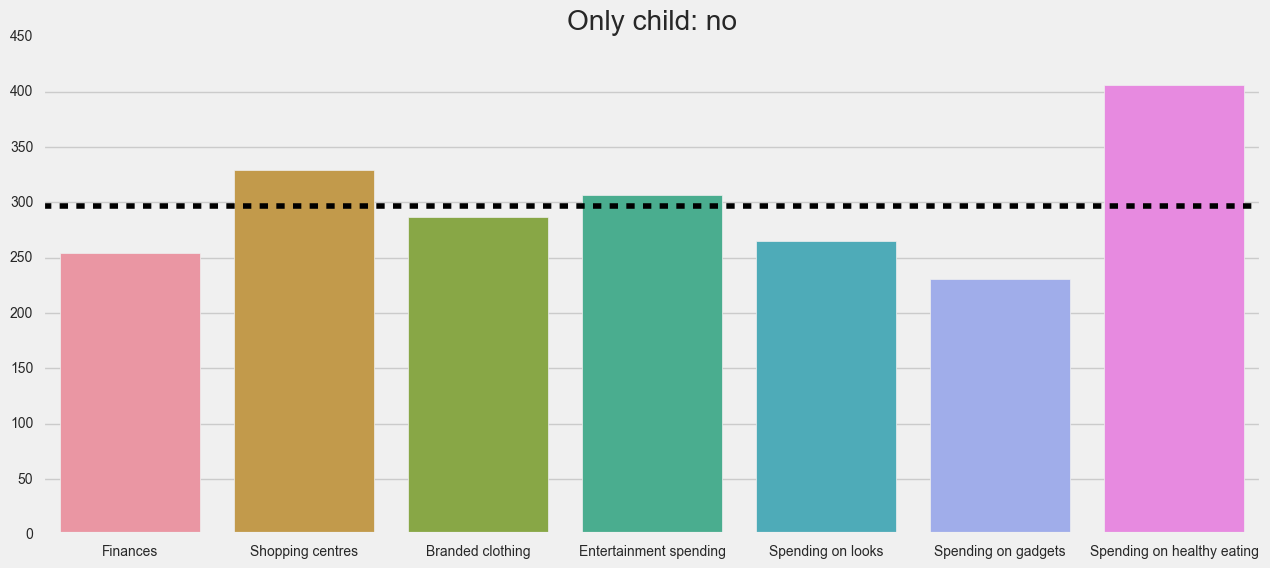

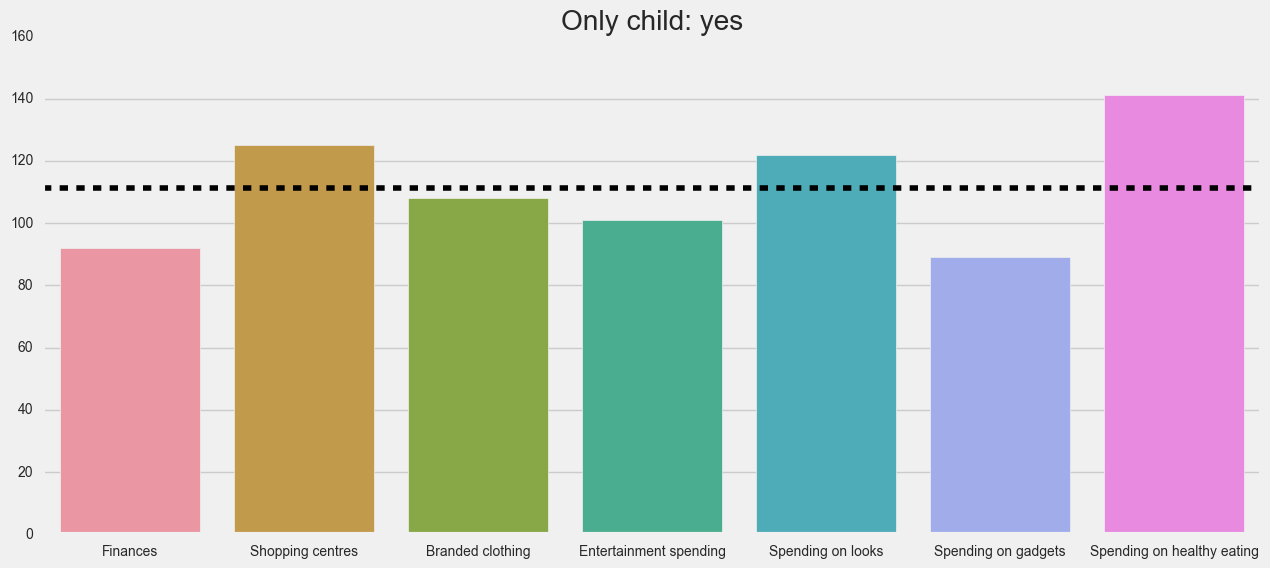

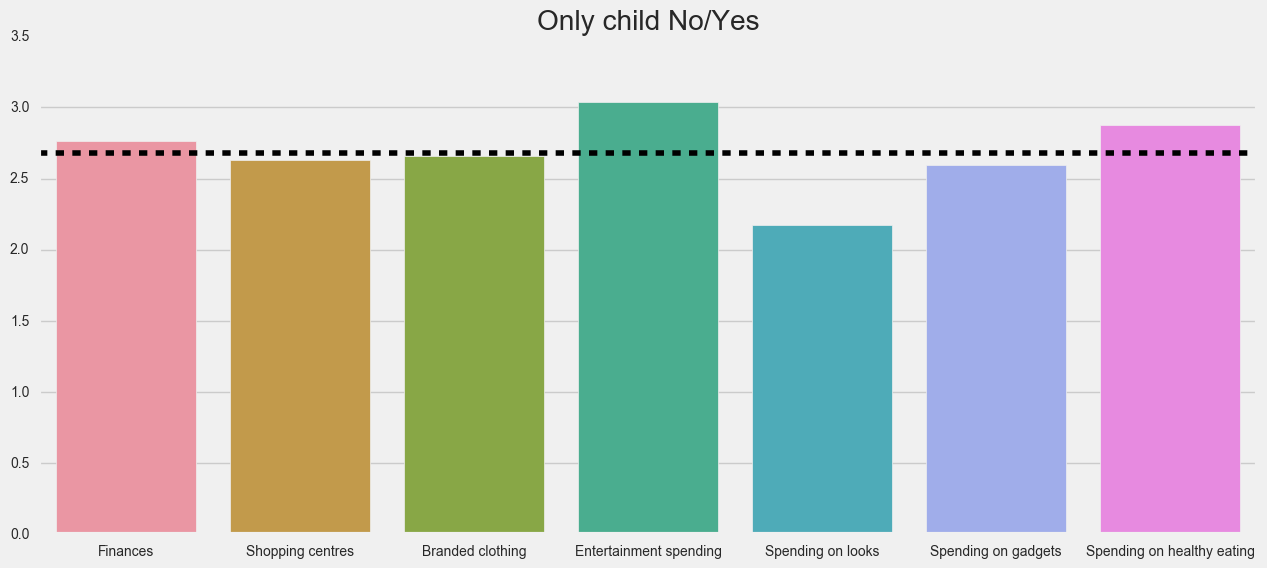

In [10]:
temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Only child').count()['Age'][0])
plt.figure(figsize=(14,6))
plt.title('Only child: {}'.format(like[i].groupby('Only child').count()['Age'].index[0]))
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Only child').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('Only child: {}'.format(like[i].groupby('Only child').count()['Age'].index[1]))
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Only child').count()['Age'][0]/
                like[i].groupby('Only child').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('Only child No/Yes')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

## Shopping habits by Residence

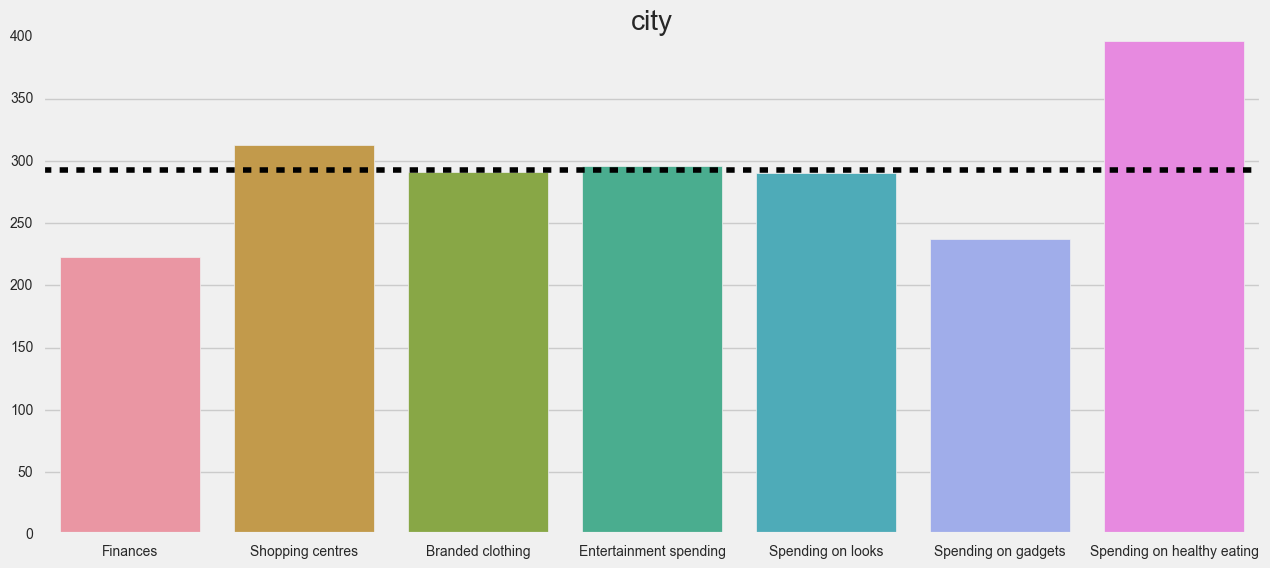

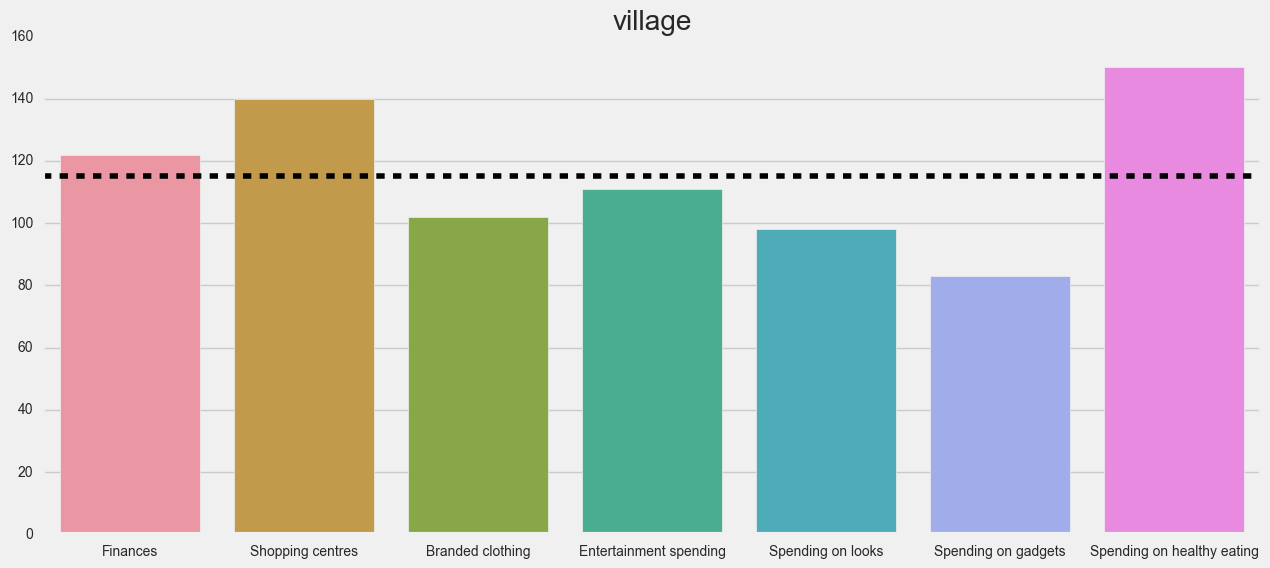

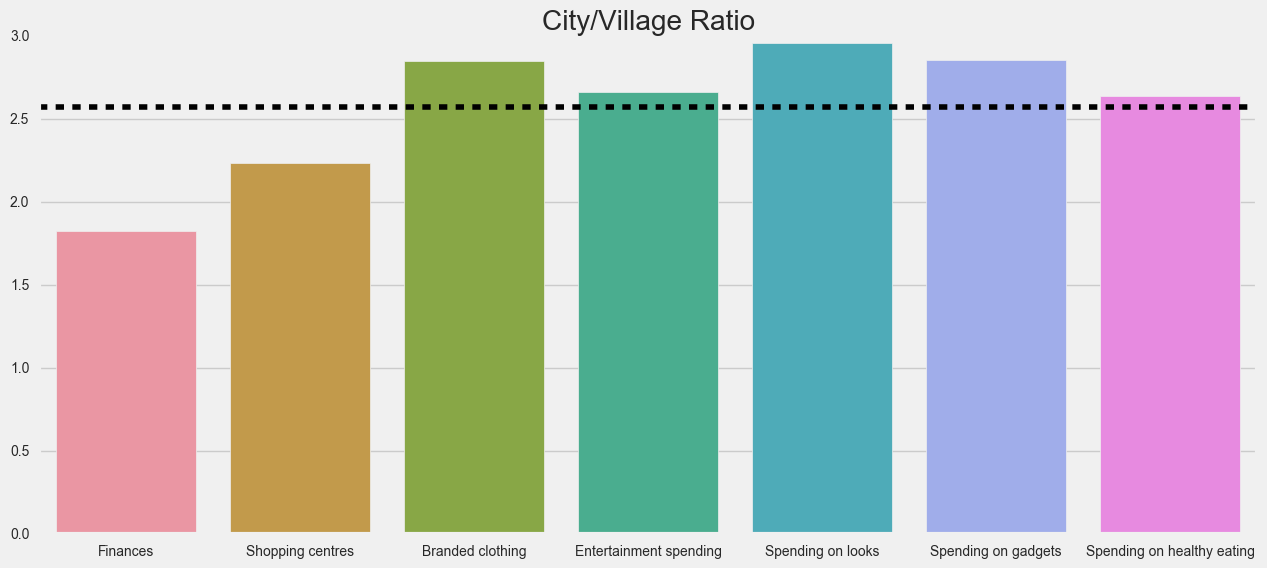

In [11]:
temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Village - town').count()['Age'][0])
plt.figure(figsize=(14,6))
plt.title('{}'.format(like[i].groupby('Village - town').count()['Age'].index[0]))
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Village - town').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('{}'.format(like[i].groupby('Village - town').count()['Age'].index[1]))
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

temp = []
for i in spending.columns:
    temp.append(like[i].groupby('Village - town').count()['Age'][0]/
                like[i].groupby('Village - town').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('City/Village Ratio')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

## Shopping habits by Childhood lived

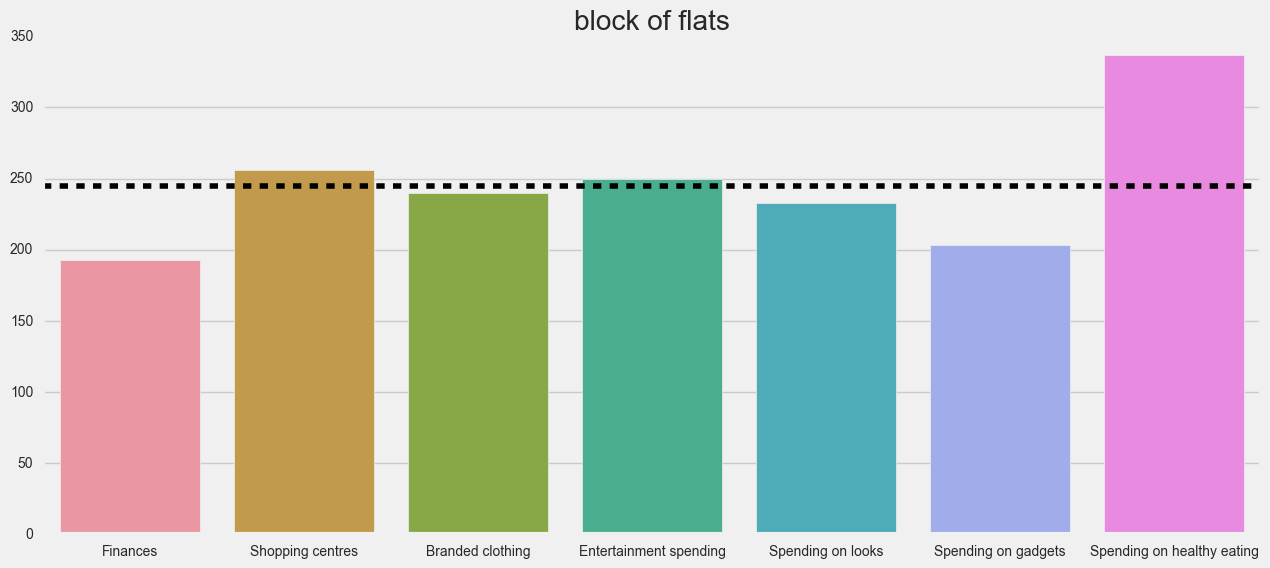

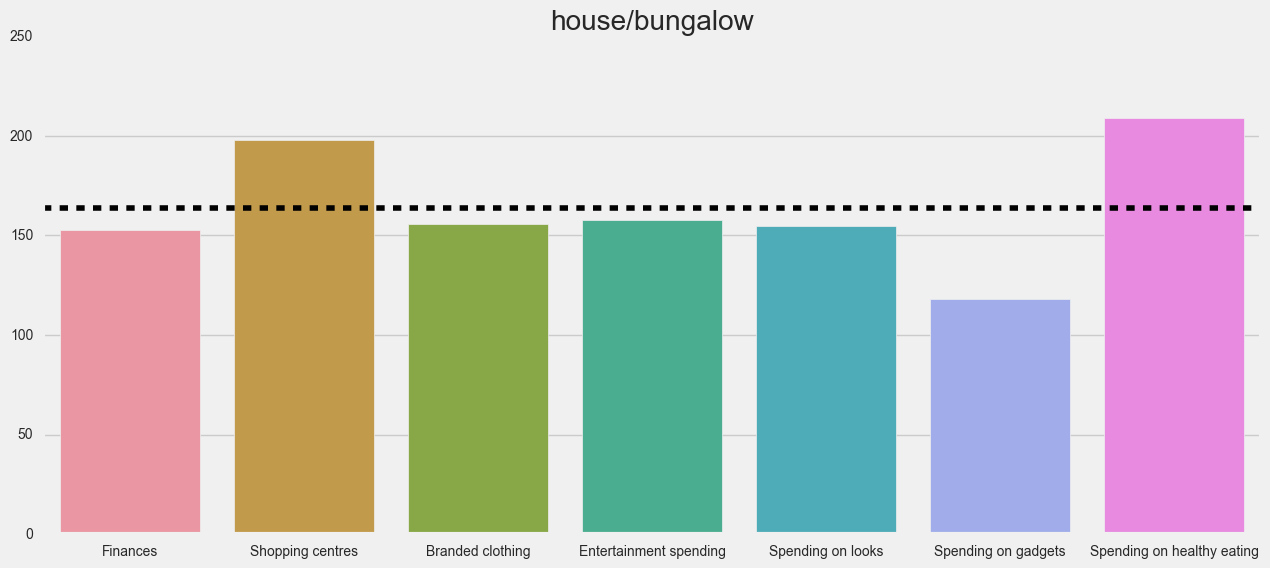

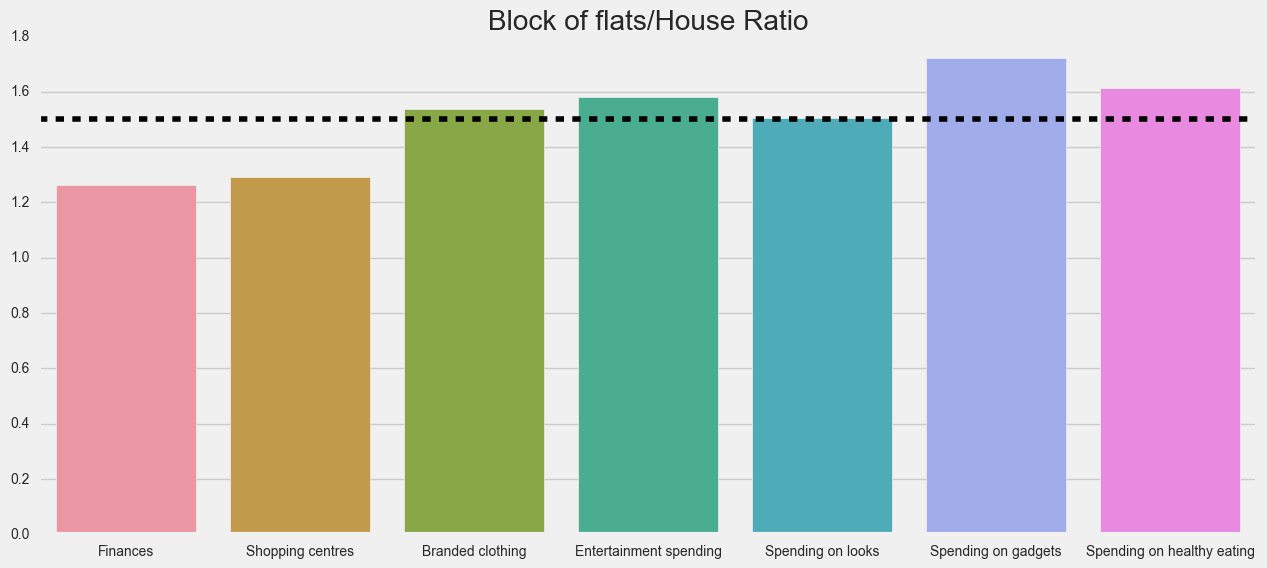

In [13]:
temp = []
for i in spending.columns:
    temp.append(like[i].groupby('House - block of flats').count()['Age'][0])
plt.figure(figsize=(14,6))
plt.title('{}'.format(like[i].groupby('House - block of flats').count()['Age'].index[0]))
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

temp = []
for i in spending.columns:
    temp.append(like[i].groupby('House - block of flats').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('{}'.format(like[i].groupby('House - block of flats').count()['Age'].index[1]))
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

temp = []
for i in spending.columns:
    temp.append(like[i].groupby('House - block of flats').count()['Age'][0]/
                like[i].groupby('House - block of flats').count()['Age'][1])
plt.figure(figsize=(14,6))
plt.title('Block of flats/House Ratio')
plt.axhline(y=np.mean(temp), color='k', lw=4, ls='dashed')
sns.barplot(spending.columns,temp)

**Numerial data stat for each shopping habits**

In [14]:
for i in spending.columns:
    print('TITLE: {}'.format(i))
    print(like[i][demo2].dropna().describe())
    print('\n')

TITLE: Finances
              Age      Height      Weight  Number of siblings
count  337.000000  337.000000  337.000000          337.000000
mean    20.596439  172.581602   65.433234            1.261128
std      2.790884    9.273940   13.689450            1.036565
min     15.000000  148.000000   41.000000            0.000000
25%     19.000000  167.000000   55.000000            1.000000
50%     20.000000  171.000000   63.000000            1.000000
75%     22.000000  179.000000   75.000000            2.000000
max     30.000000  203.000000  120.000000           10.000000


TITLE: Shopping centres
              Age      Height      Weight  Number of siblings
count  447.000000  447.000000  447.000000          447.000000
mean    20.136465  172.129754   64.165548            1.248322
std      2.804815   10.378107   12.927337            0.958133
min     15.000000   62.000000   41.000000            0.000000
25%     18.000000  166.000000   55.000000            1.000000
50%     20.000000  171.00000

## Playing with model

**First, I try to predict shopping centres variable in 5 degrees, but the accuracy is not good.
So, I transfer variable to binary. If you have better algorithm or good idea please let me know.**

In [15]:
## Get Dummies
smoking = pd.get_dummies(health['Smoking'],drop_first=True)
alcohol = pd.get_dummies(health['Alcohol'],drop_first=True)
gender  = pd.get_dummies(demographics['Gender'],drop_first=True)
handed  = pd.get_dummies(demographics['Left - right handed'],drop_first=True)
child   = pd.get_dummies(demographics['Only child'],drop_first=True)
vil_tow = pd.get_dummies(demographics['Village - town'],drop_first=True)
resid   = pd.get_dummies(demographics['House - block of flats'],drop_first=True)
edu   = pd.get_dummies(demographics['Education'],drop_first=True)

features = feature.join([smoking,alcohol,gender,handed,child,vil_tow,resid,edu])
features.fillna(feature.mean(),inplace=True).head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,male,right handed,yes,village,house/bungalow,currently a primary school pupil,doctorate degree,masters degree,primary school,secondary school
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


## Logistic regression

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

def binary(num):
    if num >= 4:
        return 1
    else:
        return 0

X = features
count = 1    
for i in spending.columns:

    y = spending.fillna(spending.mean(),inplace=True)[i].apply(binary)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=23)

    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    lr_pred = lr.predict(X_test)
    
    print('{}. {}'.format(count,i.upper()))
    print('  A. Confusion matrix:\n',confusion_matrix(y_test,lr_pred),'\n')
    print('  B. Classification Report:\n',classification_report(y_test,lr_pred),'\n')
    count += 1
    

1. FINANCES
  A. Confusion matrix:
 [[164  19]
 [ 97  23]] 

  B. Classification Report:
              precision    recall  f1-score   support

          0       0.63      0.90      0.74       183
          1       0.55      0.19      0.28       120

avg / total       0.60      0.62      0.56       303
 

2. SHOPPING CENTRES
  A. Confusion matrix:
 [[114  35]
 [ 51 103]] 

  B. Classification Report:
              precision    recall  f1-score   support

          0       0.69      0.77      0.73       149
          1       0.75      0.67      0.71       154

avg / total       0.72      0.72      0.72       303
 

3. BRANDED CLOTHING
  A. Confusion matrix:
 [[136  41]
 [ 65  61]] 

  B. Classification Report:
              precision    recall  f1-score   support

          0       0.68      0.77      0.72       177
          1       0.60      0.48      0.54       126

avg / total       0.64      0.65      0.64       303
 

4. ENTERTAINMENT SPENDING
  A. Confusion matrix:
 [[136  46]
 [

## Random forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

X = features
count = 1
for i in spending.columns:

    y = spending.fillna(spending.mean(),inplace=True)[i].apply(binary)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=23)

    rfc = RandomForestClassifier(n_estimators=500)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)

    print('{}. {}'.format(count,i.upper()))
    print('  A. Confusion matrix:\n',confusion_matrix(y_test,rfc_pred),'\n')
    print('  B. Classification Report:\n',classification_report(y_test,rfc_pred),'\n')
    count += 1

1. FINANCES
  A. Confusion matrix:
 [[180   3]
 [113   7]] 

  B. Classification Report:
              precision    recall  f1-score   support

          0       0.61      0.98      0.76       183
          1       0.70      0.06      0.11       120

avg / total       0.65      0.62      0.50       303
 

2. SHOPPING CENTRES
  A. Confusion matrix:
 [[120  29]
 [ 46 108]] 

  B. Classification Report:
              precision    recall  f1-score   support

          0       0.72      0.81      0.76       149
          1       0.79      0.70      0.74       154

avg / total       0.76      0.75      0.75       303
 

3. BRANDED CLOTHING
  A. Confusion matrix:
 [[157  20]
 [ 80  46]] 

  B. Classification Report:
              precision    recall  f1-score   support

          0       0.66      0.89      0.76       177
          1       0.70      0.37      0.48       126

avg / total       0.68      0.67      0.64       303
 

4. ENTERTAINMENT SPENDING
  A. Confusion matrix:
 [[158  24]
 [

## PCA

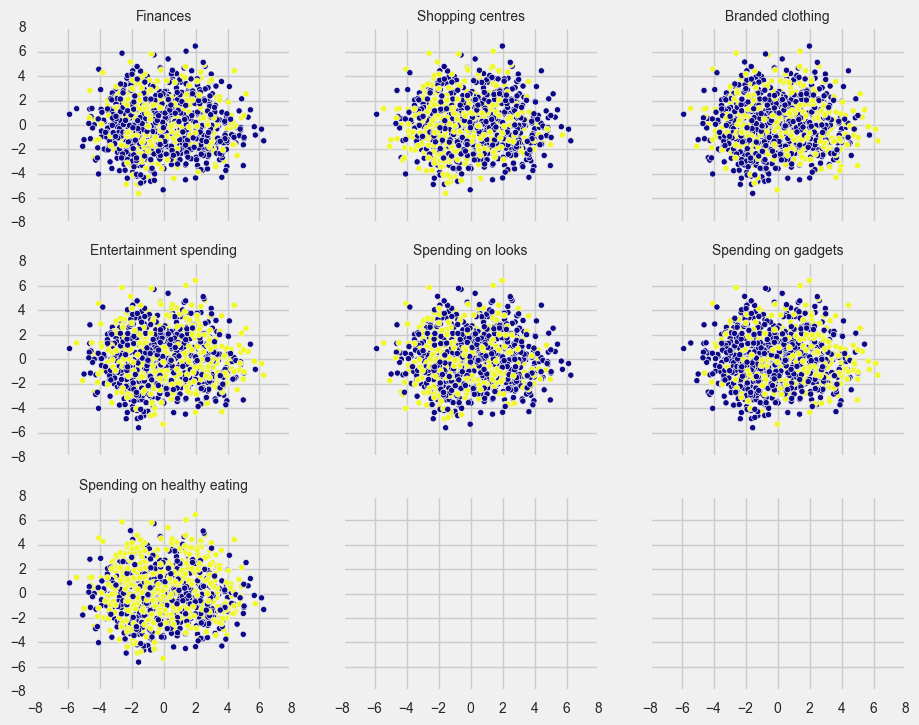

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = features
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
    
fig, axes = plt.subplots(3,3,figsize=(10,8),sharex=True,sharey=True)

num = 0
for i in range(3):
    for j in range(3):
        y = spending.fillna(spending.mean(),inplace=True)[spending.columns[num]].apply(binary)
        axes[i,j].scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
        axes[i,j].set_title('{}'.format(spending.columns[num]),fontsize=10)

        num+=1
        if num == 7:break

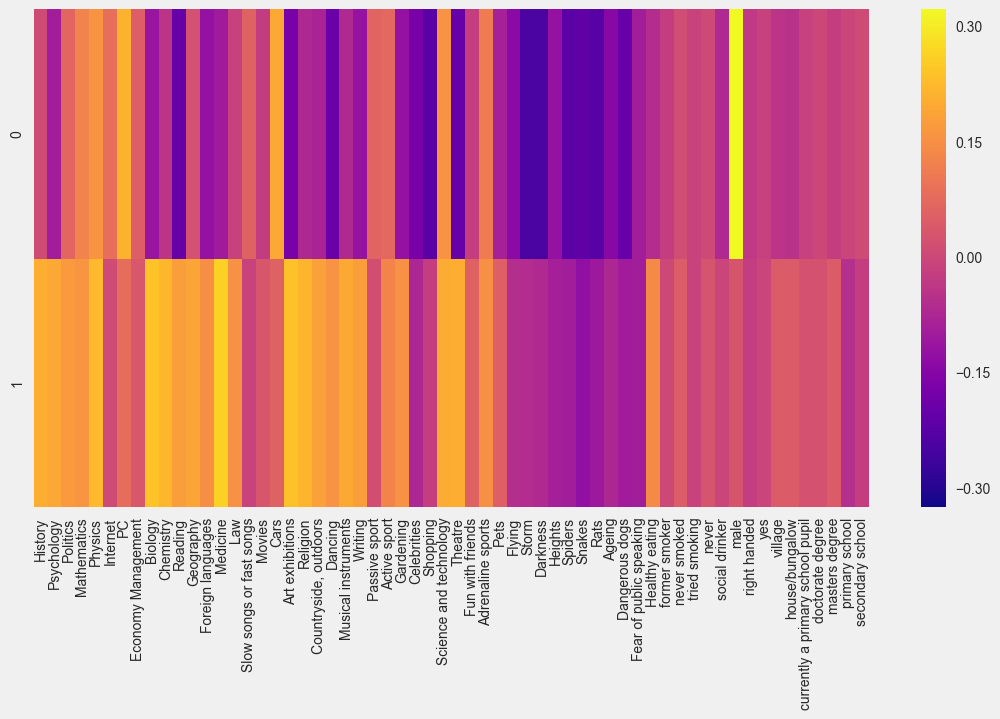

In [95]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

## XGB

1. FINANCES
  A. Confusion matrix:
 [[162  21]
 [ 97  23]] 

  B. Classification Report:
              precision    recall  f1-score   support

          0       0.63      0.89      0.73       183
          1       0.52      0.19      0.28       120

avg / total       0.58      0.61      0.55       303
 

2. SHOPPING CENTRES
  A. Confusion matrix:
 [[117  32]
 [ 44 110]] 

  B. Classification Report:
              precision    recall  f1-score   support

          0       0.73      0.79      0.75       149
          1       0.77      0.71      0.74       154

avg / total       0.75      0.75      0.75       303
 

3. BRANDED CLOTHING
  A. Confusion matrix:
 [[128  49]
 [ 63  63]] 

  B. Classification Report:
              precision    recall  f1-score   support

          0       0.67      0.72      0.70       177
          1       0.56      0.50      0.53       126

avg / total       0.63      0.63      0.63       303
 

4. ENTERTAINMENT SPENDING
  A. Confusion matrix:
 [[135  47]
 [

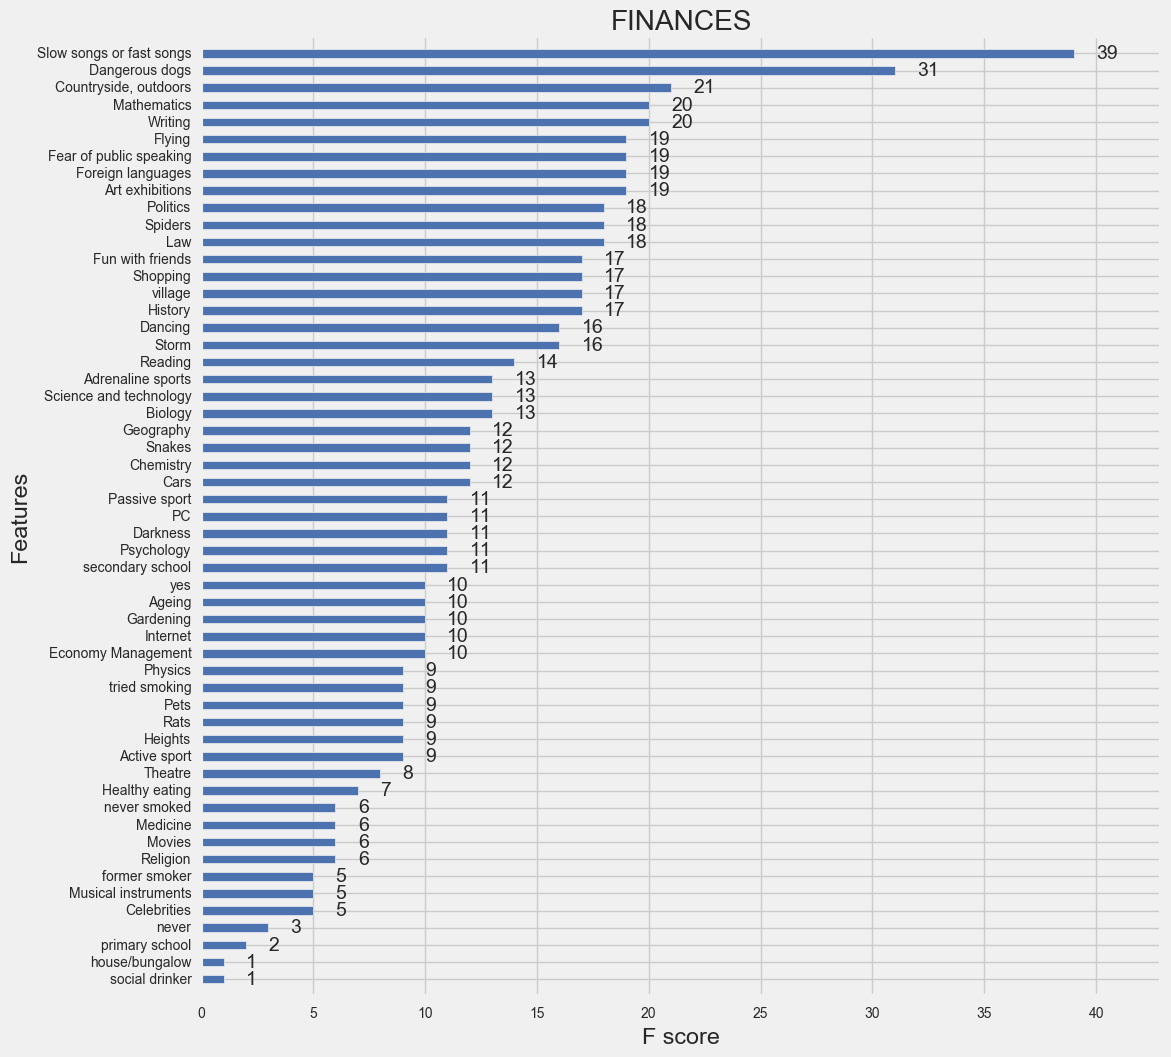

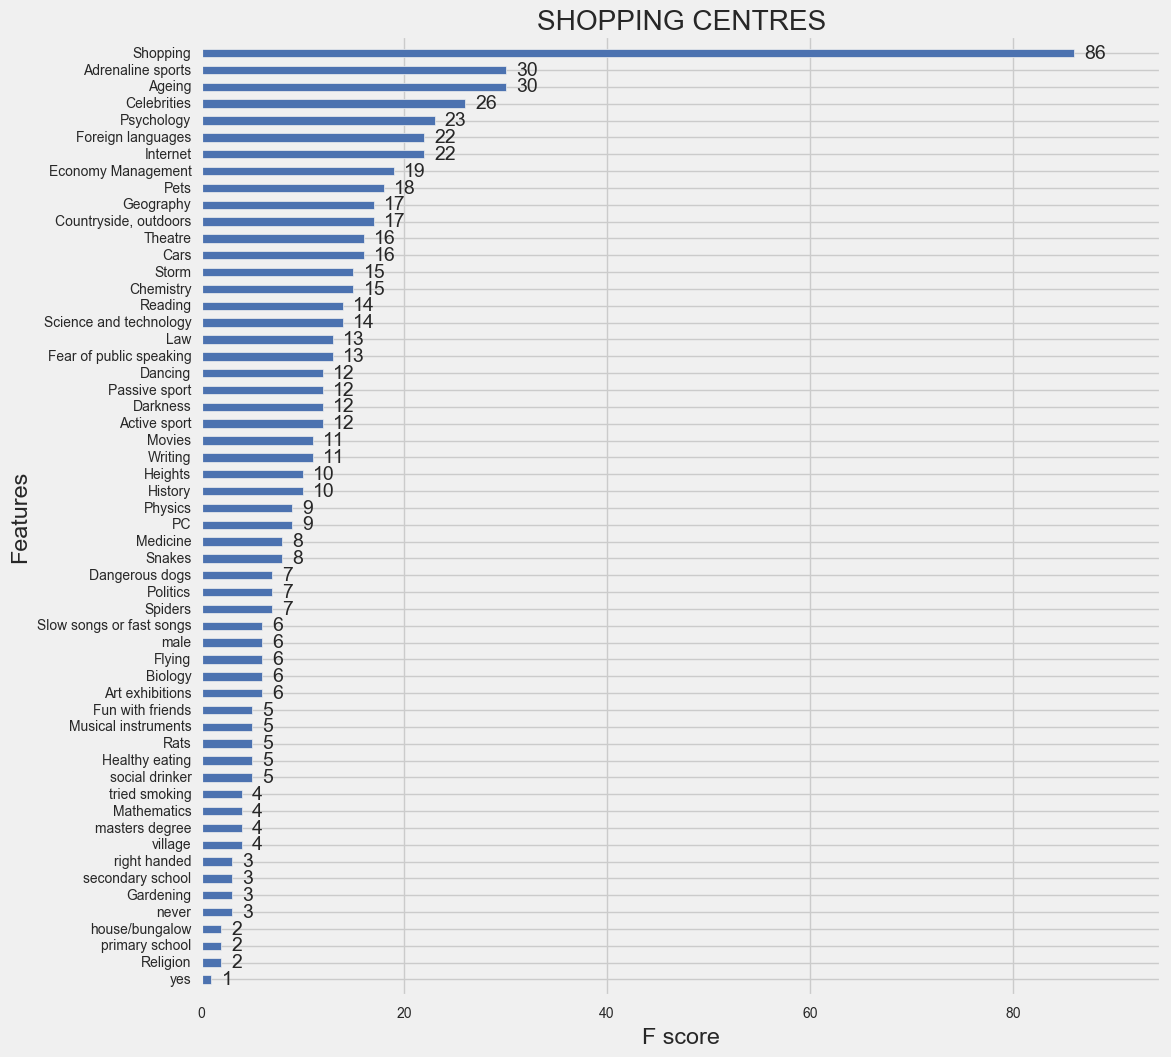

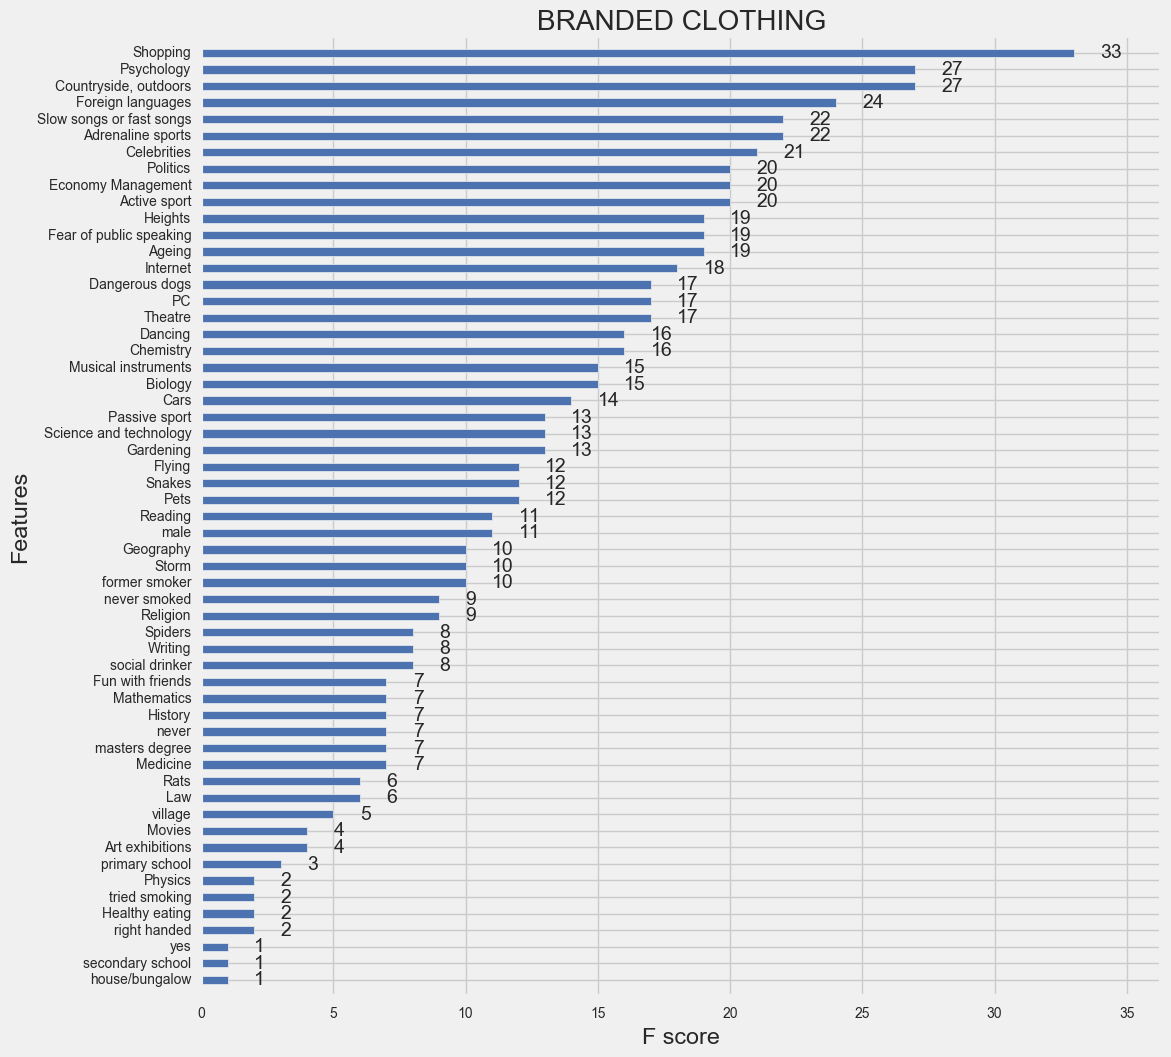

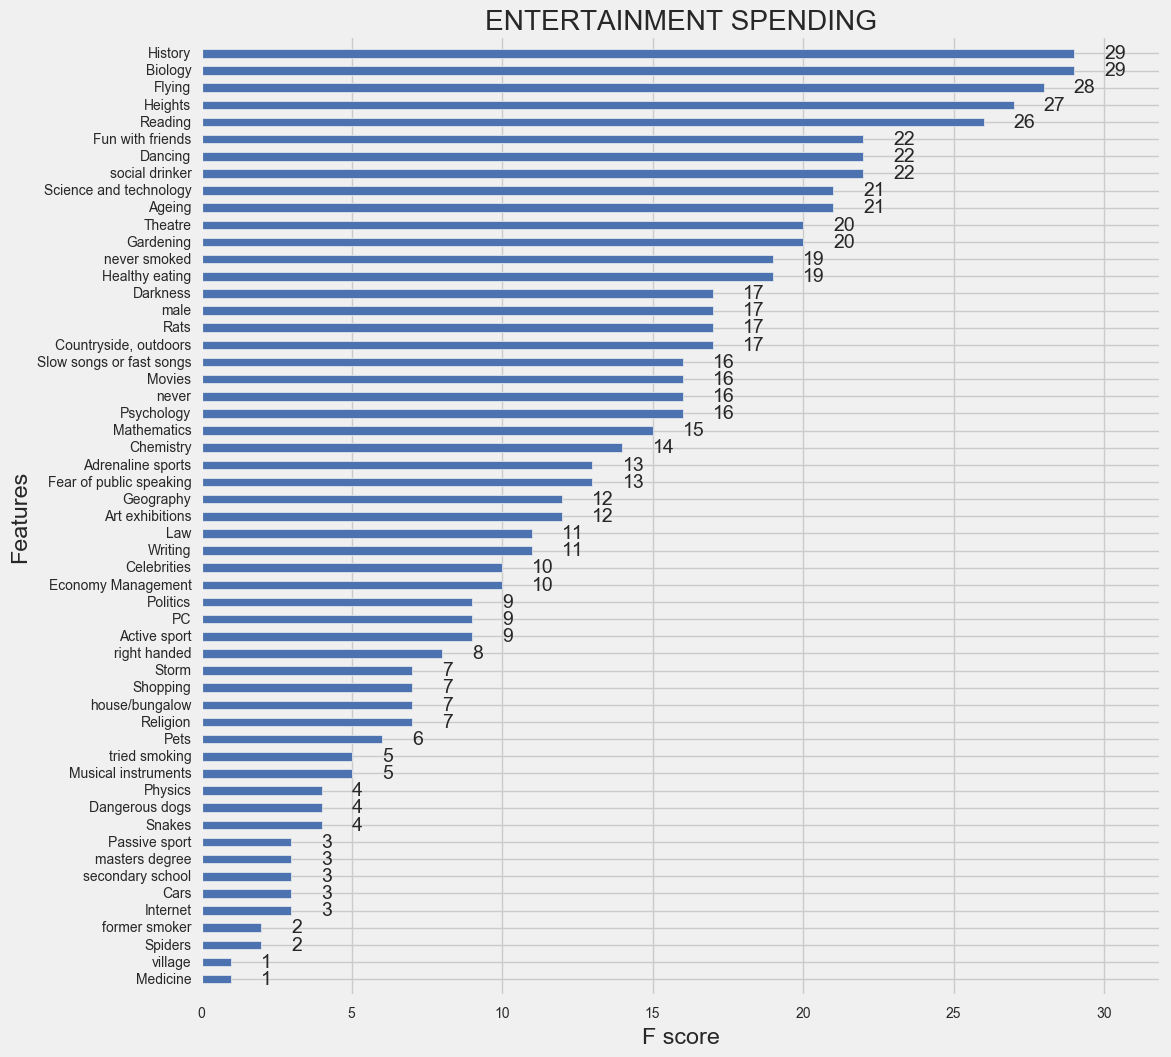

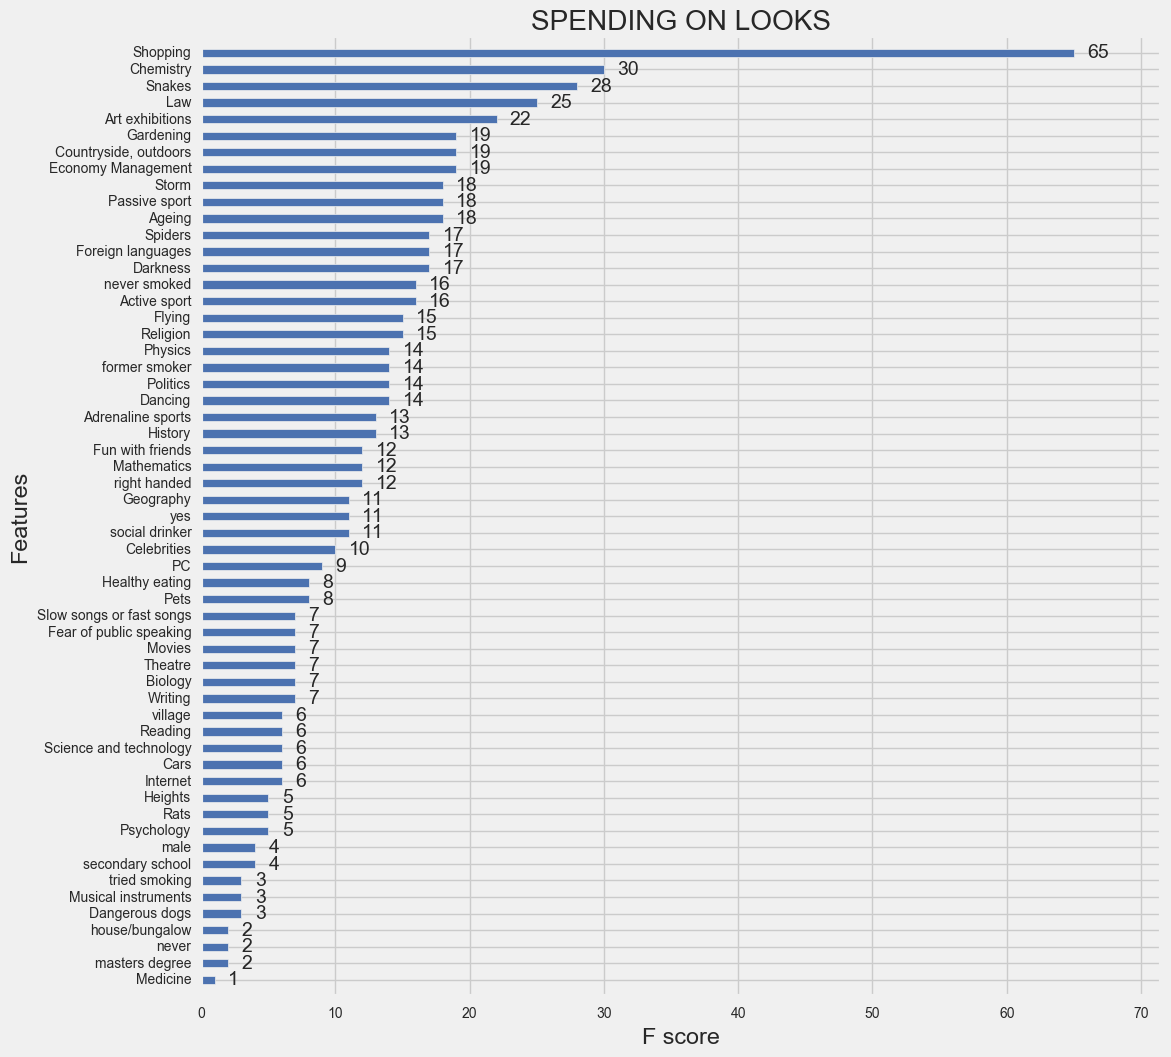

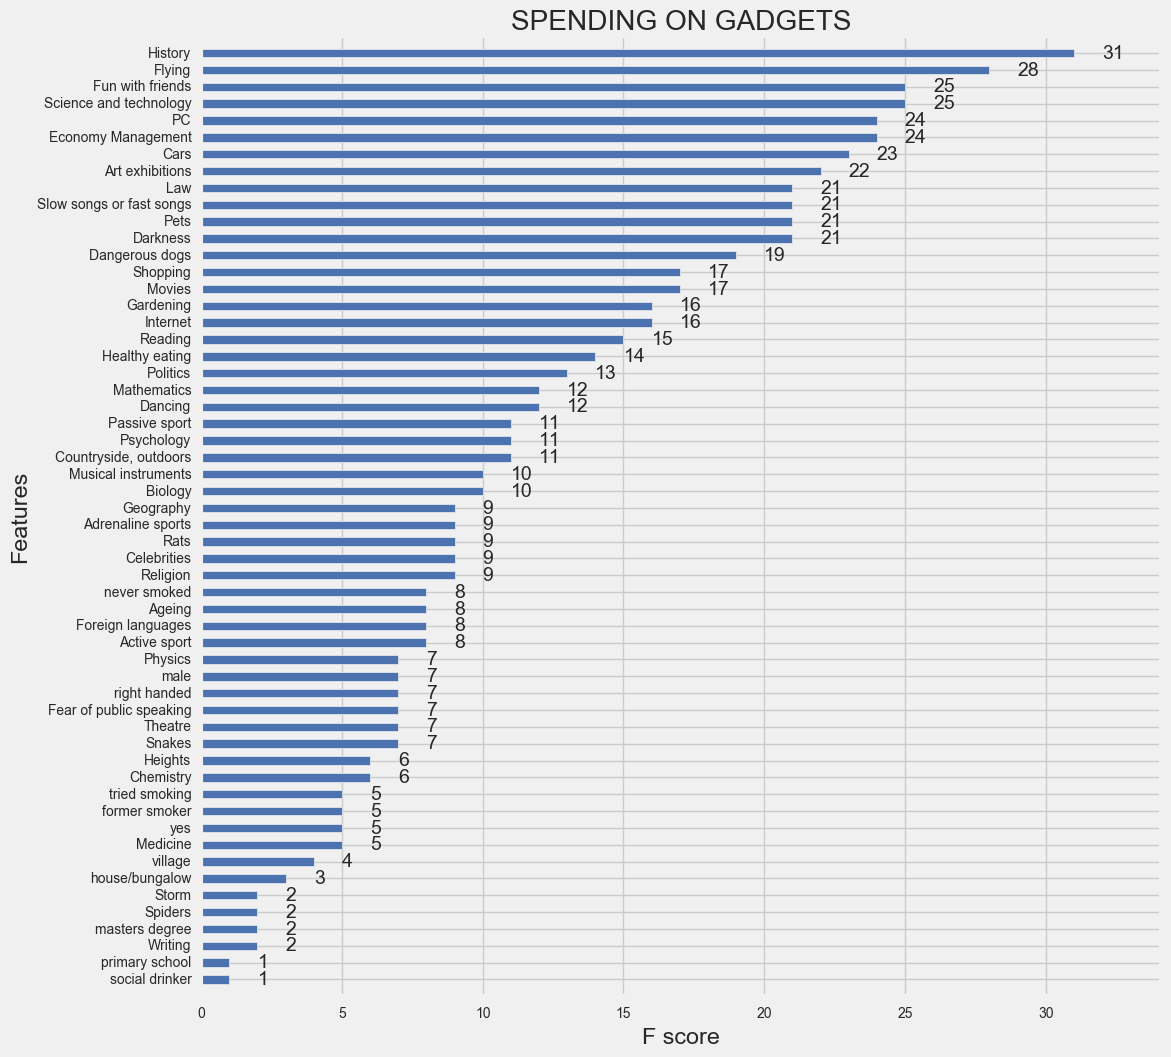

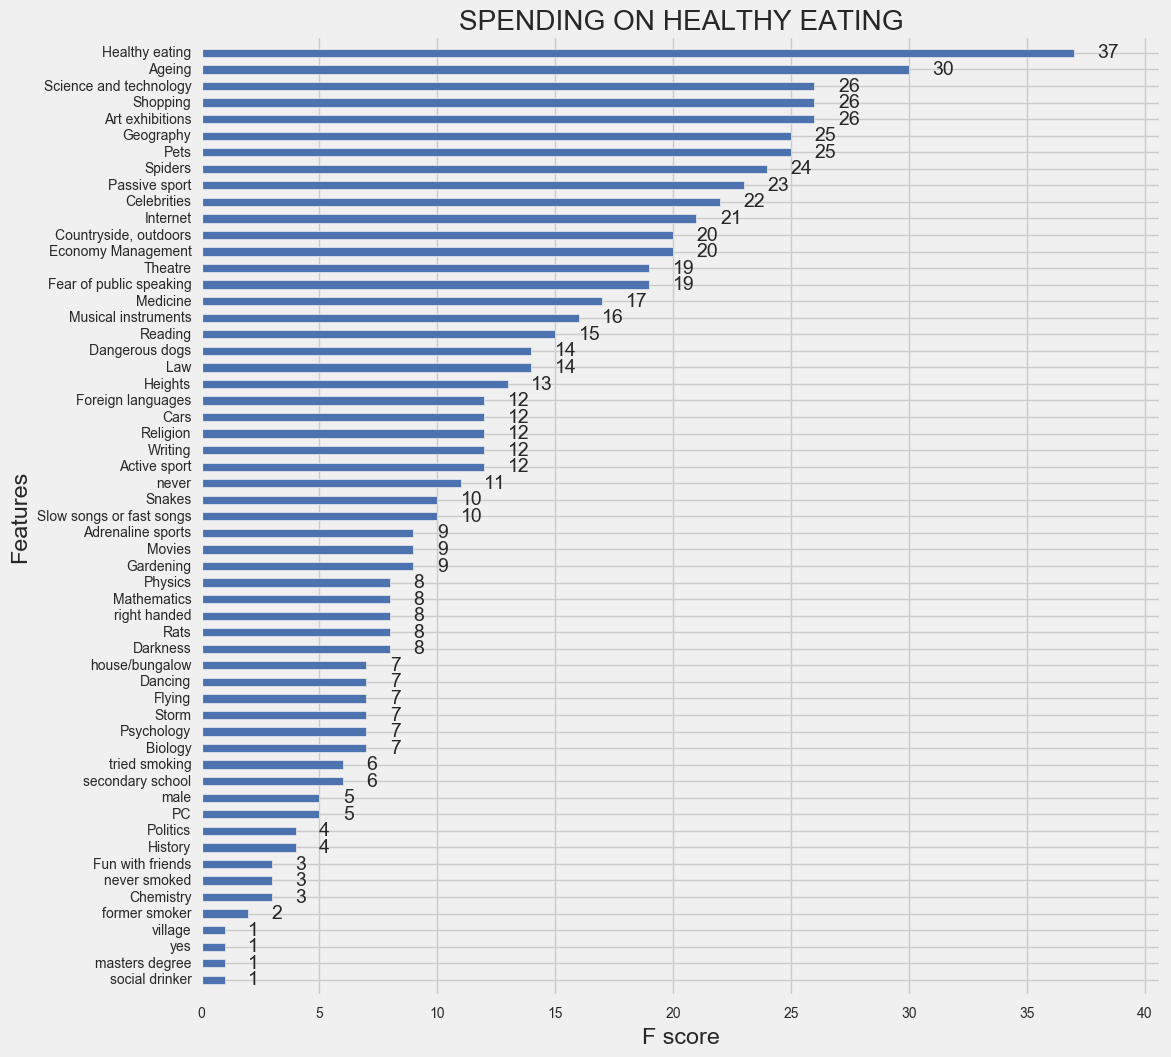

In [100]:
from xgboost import XGBClassifier
import xgboost as xgb

X = features
count = 1

for i in spending.columns:

    X = features
    y = spending.fillna(spending.mean(),inplace=True)[i].apply(binary)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=23)

    xgbc = XGBClassifier()
    xgbc.fit(X_train, y_train)
    xgbc_pred = xgbc.predict(X_test)
    
    fig = plt.figure(figsize=(12,12))
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    xgb.plot_importance(xgbc,height=0.5,ax=axes,title='{}'.format(i.upper()))

    print('{}. {}'.format(count,i.upper()))
    print('  A. Confusion matrix:\n',confusion_matrix(y_test,xgbc_pred),'\n')
    print('  B. Classification Report:\n',classification_report(y_test,xgbc_pred),'\n')
    count += 1

## Selecting feature from model

In [101]:
#from numpy import sort
#from sklearn.feature_selection import SelectFromModel
#from sklearn.metrics import accuracy_score

In [102]:
'''
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(clf.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    
'''

'\npredictions = [round(value) for value in y_pred]\naccuracy = accuracy_score(y_test, predictions)\nprint("Accuracy: %.2f%%" % (accuracy * 100.0))\n# Fit model using each importance as a threshold\nthresholds = sort(clf.feature_importances_)\nfor thresh in thresholds:\n    # select features using threshold\n    selection = SelectFromModel(clf, threshold=thresh, prefit=True)\n    select_X_train = selection.transform(X_train)\n    # train model\n    selection_model = XGBClassifier()\n    selection_model.fit(select_X_train, y_train)\n    # eval model\n    select_X_test = selection.transform(X_test)\n    y_pred = selection_model.predict(select_X_test)\n    predictions = [round(value) for value in y_pred]\n    accuracy = accuracy_score(y_test, predictions)\n    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))\n    \n'